# Main Notebook to run the Code in Colab

Open this notebook in Colab, the first few cells will copy the repo from git and make the modules available in the notebook itself.

Import any packages from the GitHub repo (for example from the src directory)
by calling src.package_name

In [2]:
# only clone and run this notebook in colab. The import should fail otherwise
import google.colab
from google.colab import files
import os
import sys

!git clone https://github.com/AveraGE0/MLRFH.git

src_path = os.path.join("MLRFH/")
# Add src folder to sys.path if not already added
if src_path not in sys.path:
    sys.path.append(src_path)

Cloning into 'MLRFH'...
remote: Enumerating objects: 224, done.
remote: Counting objects: 100% (224/224), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 224 (delta 124), reused 121 (delta 48), pack-reused 0 (from 0)
Receiving objects: 100% (224/224), 10.74 MiB | 3.29 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [3]:
os.chdir("MLRFH/")
!git pull https://github.com/AveraGE0/MLRFH.git
os.chdir("../")

From https://github.com/AveraGE0/MLRFH
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


In [4]:

PROJECT_ID = "civil-tube-440123-t8" # Replace

In [5]:
import os
from google.colab import auth

DATASET_PROJECT_ID = 'amsterdamumcdb'
DATASET_ID = 'version1_5_0'
LOCATION = 'eu'

os.environ["GOOGLE_CLOUD_PROJECT"] = PROJECT_ID

auth.authenticate_user()
print('Authenticated')

Authenticated


In [6]:
%load_ext google.colab.data_table
from google.colab.data_table import DataTable

DataTable.max_columns = 30
DataTable.max_rows = 30000

from google.cloud.bigquery import magics
from google.cloud import bigquery

def_config = bigquery.job.QueryJobConfig(default_dataset=DATASET_PROJECT_ID + "." + DATASET_ID)
magics.context.default_query_job_config = def_config

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


config_gbq = {
    'query': {
        'defaultDataset': {
              "datasetId": DATASET_ID,
              "projectId": DATASET_PROJECT_ID
        },
    'Location': LOCATION}
}

In [7]:
#get the amsterdamumcdb package from PyPI repository for use in Colab
!pip install amsterdamumcdb
import amsterdamumcdb as adb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.5/552.5 kB 9.1 MB/s eta 0:00:00


Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
INFO: 
Unique septic persons: 1746
Unique septic admissions: 1882
INFO: 
Unique septic shock persons: 1258
Unique septic shock admissions: 1321
Septic shock patients: 1321
Downloading: 100%|██████████|
Unique features being loaded ['Weight' 'Heart Rate' 'Systolic Blood Pressure' 'Mean Blood Pressure'
 'Diastolic blood pressure' 'Respiratory rate' 'SpO2' 'Temperature'
 'Potassium' 'Sodium' 'Chloride' 'Glucose' 'Urea' 'Creatinine' 'Magnesium'
 'Calcium.ionized' 'Calcium' 'paCO2' 'Aspartate aminotransferase'
 'Alanine aminotransferase' 'Bilirubin.total' 'Albumin' 'Hemoglobin'
 'Leukocytes' 'Platelets' 'aPTT' 'PT' 'INR' 'pH Blood' 'PaOxygen'
 'Base excess' 'Bicarbon

processing f35 features: 100%|██████████| 35/35 [00:48<00:00,  1.39s/it]


Dropped 1257564 outliers.
35970739 values are still present.
Index before: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64'), after: RangeIndex(start=0, stop=10, step=1)
Wide temp dps: 461678
Wide temp rows: 1126773
feature_name  visit_occurrence_id      measurement_datetime  \
0                              11 2005-12-31 22:11:00+00:00   
1                              11 2005-12-31 22:19:00+00:00   
2                              11 2005-12-31 22:50:00+00:00   
3                              11 2005-12-31 23:04:00+00:00   
4                              11 2006-01-01 00:00:00+00:00   

feature_name  Alanine aminotransferase  Albumin  Aspartate aminotransferase  \
0                                 54.0      NaN                        85.0   
1                                  NaN      NaN                         NaN   
2                                  NaN      NaN                         NaN   
3                                  NaN      NaN                         NaN   
4      

Processing 2 columns:   0%|          | 0/2 [00:00<?, ?it/s]

procssing column ['pao2_fio2_ratio', 'pao2']
procssing column ['pao2_fio2_ratio', 'pao2']


100%|██████████| 1321/1321 [00:04<00:00, 270.93it/s]


Index(['visit_occurrence_id', 'measurement_datetime',
       'Alanine aminotransferase', 'Albumin', 'Aspartate aminotransferase',
       'Base excess', 'Bicarbonate', 'Bilirubin.total', 'Calcium',
       'Calcium.ionized', 'Chloride', 'Creatinine', 'Diastolic blood pressure',
       'FiO2', 'Glucose', 'Heart Rate', 'Hemoglobin', 'INR', 'Lactate',
       'Leukocytes', 'Magnesium', 'Mean Blood Pressure', 'PT', 'PaOxygen',
       'Platelets', 'Potassium', 'Respiratory rate', 'Sodium', 'SpO2',
       'Systolic Blood Pressure', 'Temperature', 'Urea', 'Urine', 'Weight',
       'aPTT', 'pH Blood', 'paCO2', 'sofa_cns_score', 'ventilatory_support',
       'pao2_fio2_ratio', 'pao2', 'Gender', 'age_at_visit'],
      dtype='object')
dataset has 1464083 non-na entries!
transforming Alanine aminotransferase
transforming Albumin
transforming Aspartate aminotransferase
transforming Base excess
transforming Bicarbonate
transforming Bilirubin.total
transforming Calcium
transforming Calcium.ionized
trans

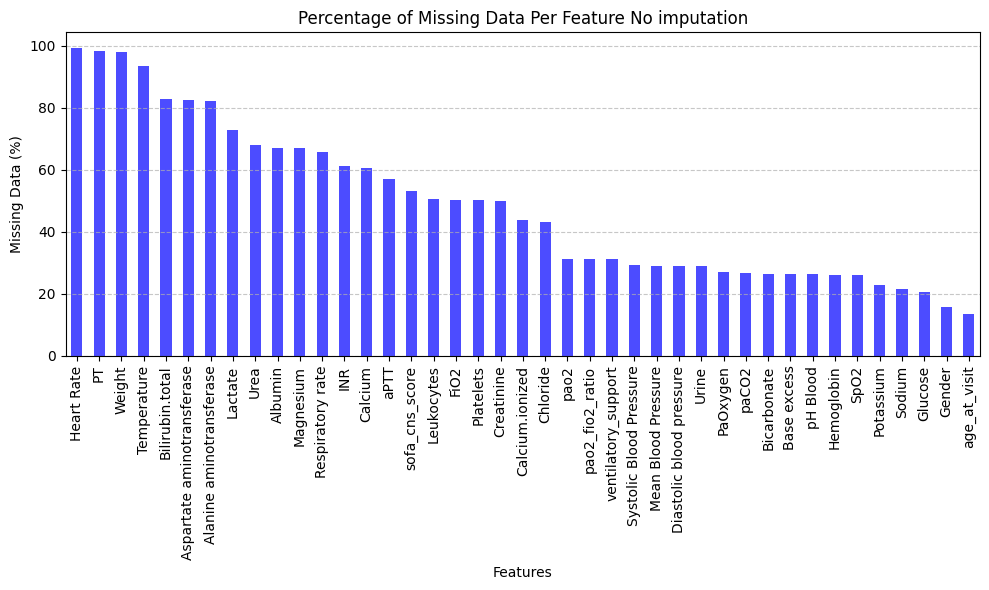

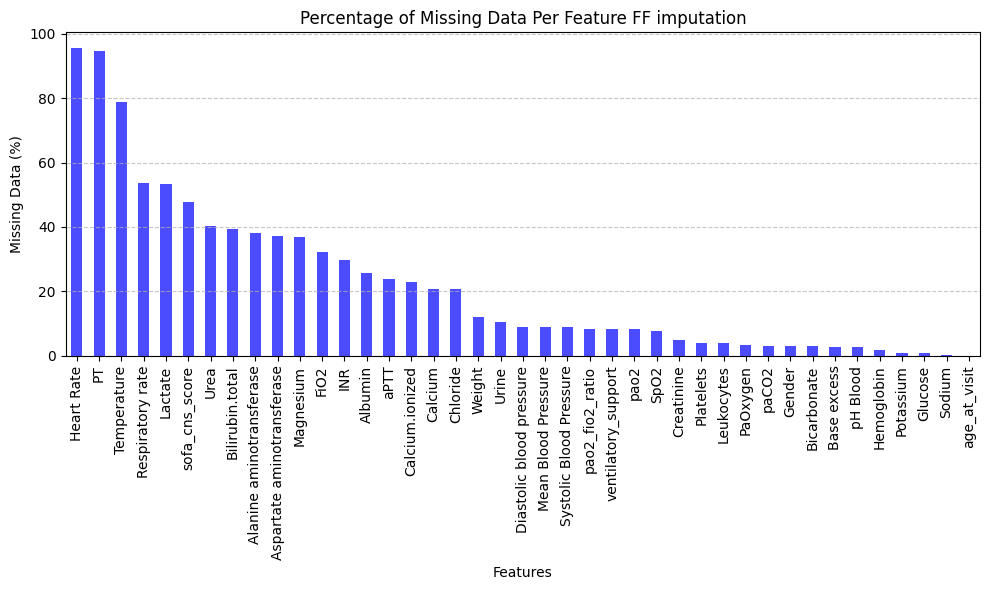

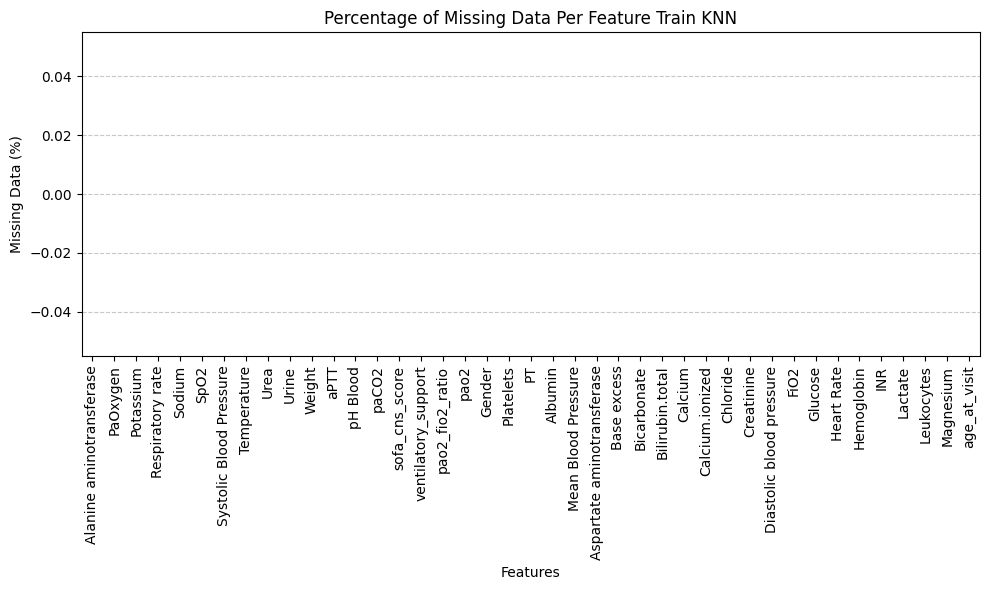

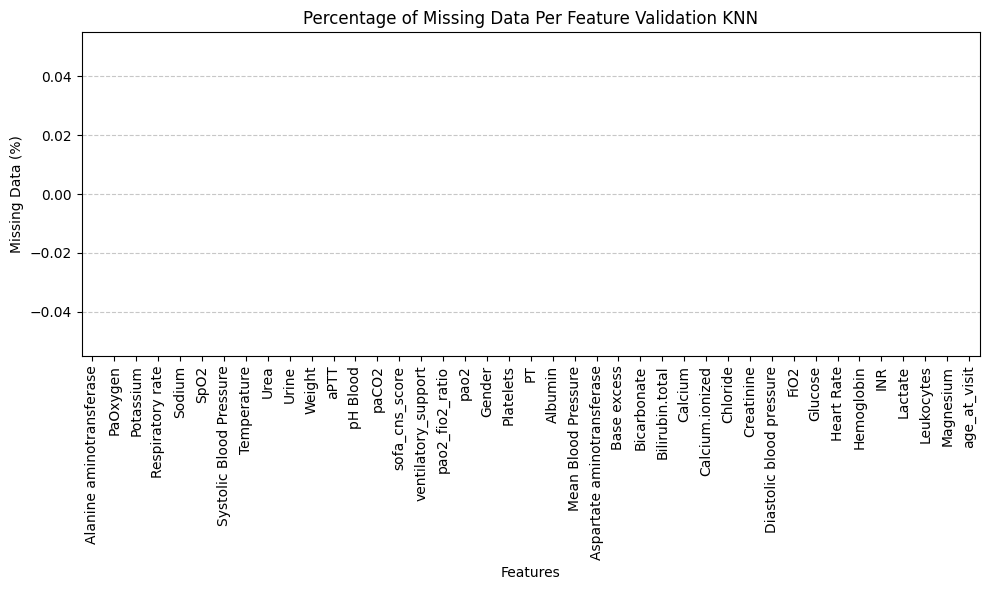

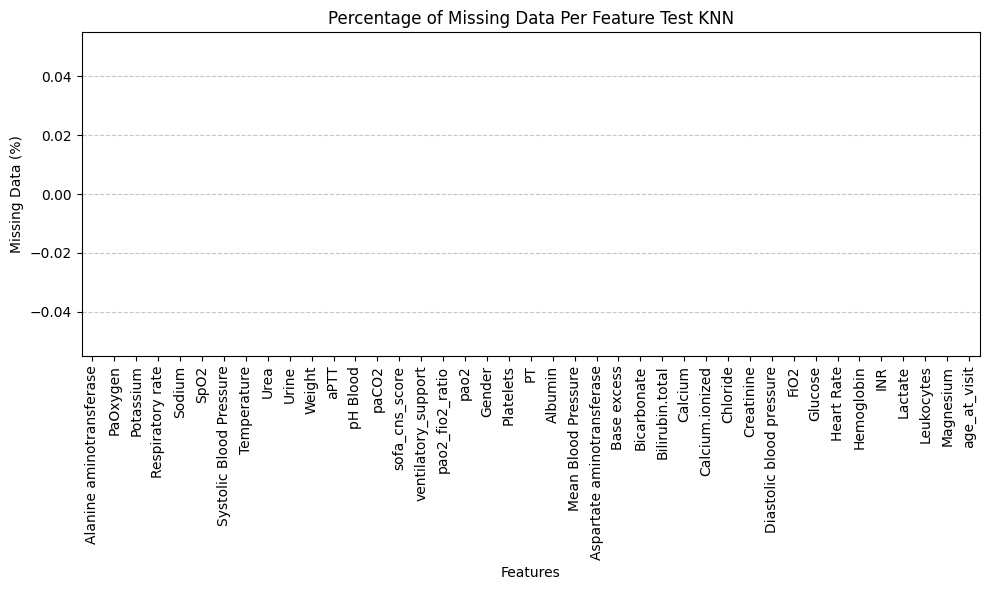

In [8]:
from src.data_processing.process import process_data


df_train, df_val, df_test = process_data(PROJECT_ID, config_gbq, default_path="./MLRFH")

df_train["pao2"] = (df_train["pao2"] - df_train["pao2"].mean()) / df_train["pao2"].std()
df_train = df_train.reset_index()




# Making the Actions (Space)

## Vasopressors and Ionotropes

In [9]:
query = f"""
WITH filtered_measurement AS (
    SELECT
        visit_occurrence_id,
        value_as_number AS patientweight
    FROM measurement
    WHERE provider_id IS NULL
    AND measurement_concept_id IN (
        3026600, -- Body weight Estimated
        3013762, -- Body weight Measured
        3023166, -- Body weight Stated
        3025315  -- Body weight
    )
),
dosing AS (
    SELECT
        de.person_id,
        de.visit_occurrence_id,
        de.drug_concept_id AS itemid,
        c.concept_name AS item,
        de.drug_exposure_start_datetime AS start_datetime,
        de.drug_exposure_end_datetime AS stop_datetime,
        TIMESTAMP_DIFF(de.drug_exposure_end_datetime, de.drug_exposure_start_datetime, MINUTE) AS duration,
        -- Extract dose and rate from the sig field
        CAST(REGEXP_EXTRACT(de.sig, r'(\\d+\\.?\\d*) mg') AS FLOAT64) AS dose,
        CAST(REGEXP_EXTRACT(de.sig, r'@ (\\d+\\.?\\d*) mg/uur') AS FLOAT64) AS rate,
        'mg/uur' AS rateunit,
        fm.patientweight
    FROM drug_exposure de
    LEFT JOIN visit_occurrence vo ON de.visit_occurrence_id = vo.visit_occurrence_id
    LEFT JOIN concept c ON de.drug_concept_id = c.concept_id
    LEFT JOIN filtered_measurement fm ON de.visit_occurrence_id = fm.visit_occurrence_id
    WHERE c.concept_id IN (
            36411287, -- 50 ML Dopamine 4 MG/ML Injectable Solution
            21088391, -- 50 ML Dobutamine 5 MG/ML Injection
            19076867, -- Epinephrine 0.1 MG/ML Injectable Solution
            2907531  -- 50 ML Norepinephrine 0.2 MG/ML Injection
        )
    AND de.visit_occurrence_id IN {tuple(df_train.reset_index()["visit_occurrence_id"].tolist())}
    AND CAST(REGEXP_EXTRACT(de.sig, r'@ (\\d+\\.?\\d*) mg/uur') AS FLOAT64) > 0.1
)
SELECT
    person_id,
    visit_occurrence_id,
    itemid,
    item,
    duration,
    dose,
    rate,
    rateunit,
    start_datetime,
    stop_datetime,
    patientweight,
    CASE
        -- recalculate the dose to µg/kg/min ('gamma')
        WHEN rateunit = 'mg/uur' THEN (rate * 1000) / patientweight / 60 -- convert mg/hour to µg/kg/min
        ELSE NULL -- Placeholder for other conversions if necessary
    END AS gamma
FROM dosing
ORDER BY visit_occurrence_id, start_datetime
"""

sepsis_vasopressors = pd.read_gbq(query, configuration=config_gbq, use_bqstorage_api=True)

#print(sepsis_vasopressors.head())
print(f"Etracted {len(sepsis_vasopressors)} records")
print(f"Unique vasopressors {sepsis_vasopressors['item'].unique()}")

sepsis_vasopressors.head()

<ipython-input-9-d33c23db63e0>:63: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  sepsis_vasopressors = pd.read_gbq(query, configuration=config_gbq, use_bqstorage_api=True)


Etracted 44146 records
Unique vasopressors ['50 ML norepinephrine 0.2 MG/ML Injection'
 'epinephrine 0.1 MG/ML Injectable Solution'
 '50 ML Dopamine 4 MG/ML Injectable Solution'
 '50 ML Dobutamine 5 MG/ML Injection']


person_id  visit_occurrence_id   itemid  \
0         11                   11  2907531   
1         11                   11  2907531   
2         11                   11  2907531   
3         11                   11  2907531   
4         11                   11  2907531   

                                       item  duration   dose  rate rateunit  \
0  50 ML norepinephrine 0.2 MG/ML Injection        75  10.00   8.0   mg/uur   
1  50 ML norepinephrine 0.2 MG/ML Injection        75  10.00   8.0   mg/uur   
2  50 ML norepinephrine 0.2 MG/ML Injection        75  10.00   8.0   mg/uur   
3  50 ML norepinephrine 0.2 MG/ML Injection        56   7.47   8.0   mg/uur   
4  50 ML norepinephrine 0.2 MG/ML Injection        15   2.53  10.0   mg/uur   

             start_datetime             stop_datetime  \
0 2006-01-01 00:49:00+00:00 2006-01-01 02:04:00+00:00   
1 2006-01-01 02:04:00+00:00 2006-01-01 03:19:00+00:00   
2 2006-01-01 03:19:00+00:00 2006-01-01 04:34:00+00:00   
3 2006-01-01 04:34:00+00:00 2006-01-01 05:30:00+00:00   
4 2006-01-01 05:30:00+00:00 2006-01-01 05:45:00+00:00   

                               patientweight     gamma  
0  85.00000000000000000000000000000000000000  1.568627  
1  85.00000000000000000000000000000000000000  1.568627  
2  85.00000000000000000000000000000000000000  1.568627  
3  85.00000000000000000000000000000000000000  1.568627  
4  85.00000000000000000000000000000000000000  1.960784

### Calculating Epinephrine Equivalent Values[[1](https://pmc.ncbi.nlm.nih.gov/articles/PMC3590882/pdf/chest_143_3_664.pdf)] (e-table 2)

| Vasopressor | Norepinephrine Equivalent Dose |
|-|-|
|Epinephrine| 1 |
| Norepinephrin | 1 |
|Dopamin| 0.01|
|Dobutamine**| 0.01 |




** Derived from VIS-score[[1](https://www.sciencedirect.com/science/article/abs/pii/S1053077020310351?fr=RR-1&ref=cra_js_challenge)]

Exact values might differ [[2](https://www.researchgate.net/publication/367302762_An_updated_norepinephrine_equivalent_score_in_intensive_care_as_a_marker_of_shock_severity/fulltext/63cb3720d9fb5967c2f1bafe/An-updated-norepinephrine-equivalent-score-in-intensive-care-as-a-marker-of-shock-severity.pdf?origin=publication_detail&_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6InB1YmxpY2F0aW9uIiwicGFnZSI6InB1YmxpY2F0aW9uRG93bmxvYWQiLCJwcmV2aW91c1BhZ2UiOiJwdWJsaWNhdGlvbiJ9fQ)].

In [10]:
convert_dict = {
    "epinephrine": 1.0,
    "norepinephrine": 1.0,
    "dopamine": 0.01,
    "dobutamine": 0.01,
}


def equalize_dose(row):
    for key in convert_dict.keys():
        if key in row["item"].lower():
            return row["gamma"] * convert_dict[key]
    raise ValueError(f"Unknown vasopressor {row['item']}")


sepsis_vasopressors["equiv_gamma"] = sepsis_vasopressors.apply(equalize_dose, axis=1)

# drop outliers based in inter quantile range
sepsis_vasopressors_cleaned = sepsis_vasopressors[sepsis_vasopressors["equiv_gamma"] < sepsis_vasopressors["equiv_gamma"].quantile(0.99)]
sepsis_vasopressors_cleaned = sepsis_vasopressors_cleaned.reset_index()

for item in sepsis_vasopressors_cleaned["item"].unique():
    print("Mean dose for:", item, sepsis_vasopressors_cleaned[sepsis_vasopressors_cleaned["item"] == item]["equiv_gamma"].mean())

Mean dose for: 50 ML norepinephrine 0.2 MG/ML Injection 0.30767138801693344
Mean dose for: epinephrine 0.1 MG/ML Injectable Solution 0.4345157138627954
Mean dose for: 50 ML Dopamine 4 MG/ML Injectable Solution 0.05343824384482604
Mean dose for: 50 ML Dobutamine 5 MG/ML Injection 0.048168767754822886


|Dose Range	|Mean|Mode|% of Data
|[0]|?	|?	|?	
|]0-0.08|0.05126128202572899|0.04444444444444444|0.2403460594425138
|]0.08-0.22|0.13925176453070737|0.08888889111111112|0.32892658387810153
|]0.22-0.45|0.317008833118538|0.22222222222222224|0.2232375027339668
|>0.45|0.8095733533157431|0.5128205128205129|0.20748985394541788


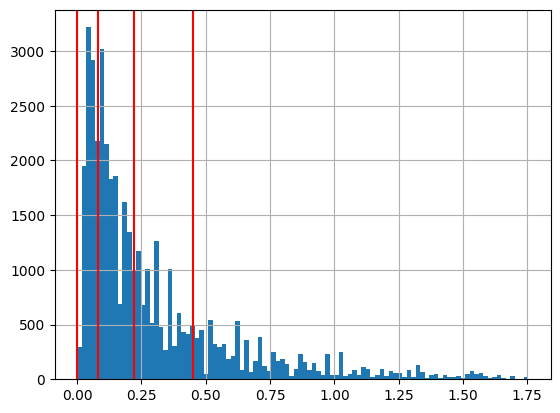

In [11]:
# make histogram of data
sepsis_vasopressors_cleaned["equiv_gamma"].hist(bins=100)

bins = [0, 0, 0.08, 0.22, 0.45]


print("|Dose Range\t|Mean|Mode|% of Data")
for i, bin in enumerate(bins):
    if i == 0:
        print(f"|[0]|?\t|?\t|?\t")
        continue
    if i == len(bins) - 1:
        bin_vasopressor = sepsis_vasopressors_cleaned[
              sepsis_vasopressors_cleaned["equiv_gamma"] > bin
        ]
        print(f"|>{bin}", end="")
    else:
        bin_vasopressor = sepsis_vasopressors_cleaned[
            (sepsis_vasopressors_cleaned["equiv_gamma"] > bin) & (sepsis_vasopressors_cleaned["equiv_gamma"] <= bins[i+1])
        ]
        print(f"|]{bin}-{bins[i+1]}", end="")
    print(f"|{bin_vasopressor['equiv_gamma'].mean()}|{bin_vasopressor['equiv_gamma'].mode().mean()}|{len(bin_vasopressor)/len(sepsis_vasopressors_cleaned)}")
    plt.axvline(bin, color="red")



## Fluid Intake

In [12]:
sepsis_fluid = pd.read_gbq(
    f'''
    SELECT m.person_id, m.measurement_concept_id, c.concept_name, measurement_datetime, value_as_number, m.visit_occurrence_id
    FROM measurement as m

    LEFT JOIN concept c ON m.measurement_concept_id = c.concept_id

    WHERE m.visit_occurrence_id IN {tuple(df_train.reset_index()["visit_occurrence_id"].tolist())}
    AND m.provider_id IS NULL
    AND (c.concept_id = 3010494 or c.concept_id = 3037253 or c.concept_id = 3037253 or c.concept_id = 3013308)
    GROUP BY m.person_id, m.measurement_concept_id, c.concept_name, measurement_datetime, value_as_number, m.visit_occurrence_id
    '''
    , configuration=config_gbq, use_bqstorage_api=True)

sepsis_fluid["value_as_number"] = sepsis_fluid["value_as_number"].astype(float)
sepsis_fluid_cleaned = sepsis_fluid[sepsis_fluid["value_as_number"] < sepsis_fluid["value_as_number"].quantile(0.99)]
print(sepsis_fluid.columns)
sepsis_fluid.head()

<ipython-input-12-532e3b0927c2>:1: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  sepsis_fluid = pd.read_gbq(


Index(['person_id', 'measurement_concept_id', 'concept_name',
       'measurement_datetime', 'value_as_number', 'visit_occurrence_id'],
      dtype='object')


person_id  measurement_concept_id           concept_name  \
0        448                 3013308  Fluid intake Measured   
1        241                 3013308  Fluid intake Measured   
2        246                 3013308  Fluid intake Measured   
3        246                 3013308  Fluid intake Measured   
4        246                 3013308  Fluid intake Measured   

       measurement_datetime  value_as_number  visit_occurrence_id  
0 2006-01-18 12:48:00+00:00              0.0                  514  
1 2013-01-07 18:39:00+00:00              0.0                  272  
2 2013-03-01 14:02:00+00:00              0.0                  278  
3 2013-01-26 08:02:00+00:00              0.0                  278  
4 2013-01-04 08:02:00+00:00              0.0                  278

<Axes: >

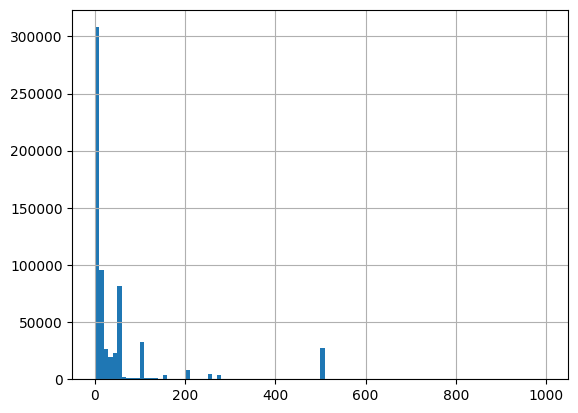

In [13]:
# make histogram for fluids
fluid_ranges = {
    0, 0, 50, 180, 530
}
sepsis_fluid_cleaned["value_as_number"].hist(bins=100)


In [14]:
import pandas as pd
import numpy as np
from tqdm import tqdm


def calculate_actions(df_sequences, df_vasopressors):
    # Step 2: Apply the function to df2
    tqdm.pandas()
    gamma_sum = df_sequences.progress_apply(lambda row: compute_window_gamma(row, df_vasopressors), axis=1)

    # Calculate average gamma (handle total_hours = 0 case)
    gamma_sum["average_gamma"] = gamma_sum["total_gamma"] / gamma_sum['total_hours']
    gamma_sum['average_gamma'] = gamma_sum['average_gamma'].fillna(0)  # Fill NaN for empty windows
    return gamma_sum["average_gamma"]


def compute_window_gamma(row, df_vasopressors):
    # Filter intervals from df1 that overlap with the current window
    row["window_end"] = row["measurement_datetime"] + pd.Timedelta(hours=12)
    row["window_start"] = row["measurement_datetime"]

    overlapping = df_vasopressors[
        (df_vasopressors['start_datetime'] < row['window_end']) &\
        (df_vasopressors['stop_datetime'] > row['window_start']) &\
        (df_vasopressors["visit_occurrence_id"] == row["visit_occurrence_id"])
    ]

    if overlapping.empty:
        return pd.Series({'total_gamma': 0, 'total_hours': 0})

    # Calculate overlap duration for normalization
    overlapping['overlap_start'] = overlapping["start_datetime"].apply(lambda x: max(x, row["window_start"]))
    overlapping['overlap_end'] = overlapping["stop_datetime"].apply(lambda x: min(x, row["window_end"]))
    overlapping['overlap_duration'] = (overlapping['overlap_end'] - overlapping['overlap_start']).dt.total_seconds() / 3600  # in hours

    # Compute weighted gamma
    overlapping['weighted_gamma'] = overlapping['equiv_gamma'] * overlapping['overlap_duration']

    # Aggregate results for this window
    total_gamma = overlapping['weighted_gamma'].sum()
    total_hours = overlapping['overlap_duration'].sum()
    return pd.Series({'total_gamma': total_gamma, 'total_hours': total_hours})


gamma_avg = calculate_actions(df_train[["visit_occurrence_id", "measurement_datetime"]], sepsis_vasopressors_cleaned)


100%|██████████| 30909/30909 [02:26<00:00, 210.63it/s]


average_gamma    0.772508
Name: 0.99, dtype: float64


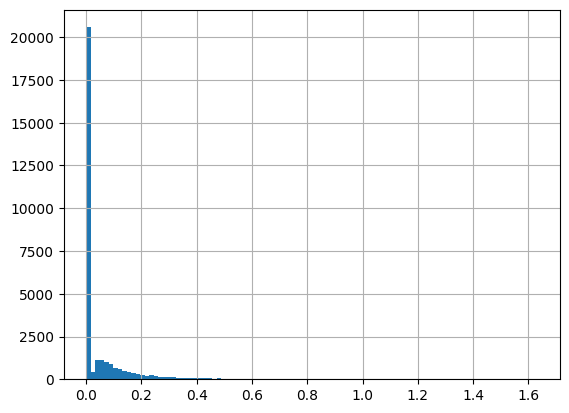

In [15]:
gamma_avg.hist(bins=100)
print(pd.DataFrame(gamma_avg).quantile(0.99))

In [16]:
def add_windowed_sum_apply(df_windows, df_values, time_column, value_column, start_col, time_frame, output_col):
    """
    Add a column to `df_windows` with the sum of values in `df_values` that fall within the time windows.

    Parameters:
        df_windows (pd.DataFrame): The DataFrame with time windows.
        df_values (pd.DataFrame): The DataFrame with values and their corresponding timestamps.
        time_column (str): The name of the time column in `df_values`.
        value_column (str): The name of the value column in `df_values`.
        start_col (str): The name of the start time column in `df_windows`.
        end_col (str): The name of the end time column in `df_windows`.
        output_col (str): The name of the column to add to `df_windows` for the sum.

    Returns:
        pd.DataFrame: The `df_windows` DataFrame with the added column.
    """
    # Ensure the time columns are datetime
    df_windows["window_end"] = df_windows[start_col] + pd.Timedelta(hours=time_frame)

    # Define a function to calculate the sum for a single window
    def calculate_sum(row):
        start_time, end_time = row[start_col], row["window_end"]
        return df_values[
            (df_values[time_column] >= start_time) &\
            (df_values[time_column] <= end_time) &\
            (df_values["visit_occurrence_id"] == row["visit_occurrence_id"])
        ][value_column].sum()

    # Apply the function row-wise and create a new column
    df_windows[output_col] = df_windows.progress_apply(calculate_sum, axis=1)

    return df_windows[output_col]

#df_train = df_train.reset_index()
sepsis_fluid_cleaned["measurement_datetime"] = pd.to_datetime(sepsis_fluid_cleaned["measurement_datetime"])
sepsis_fluid_cleaned["value_as_number"] = sepsis_fluid_cleaned["value_as_number"].astype(float)

df_train["fluid_intake"] = add_windowed_sum_apply(
    df_train,
    sepsis_fluid_cleaned,
    "measurement_datetime",
    "value_as_number",
    "measurement_datetime",
    12,
    "fluid_intake_sum"
)


<ipython-input-16-f845480a34f5>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sepsis_fluid_cleaned["measurement_datetime"] = pd.to_datetime(sepsis_fluid_cleaned["measurement_datetime"])
<ipython-input-16-f845480a34f5>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sepsis_fluid_cleaned["value_as_number"] = sepsis_fluid_cleaned["value_as_number"].astype(float)
100%|██████████| 30909/30909 [04:29<00:00, 114.76it/s]


1157.5349411688771
21052.599989029997
2999.339994255998


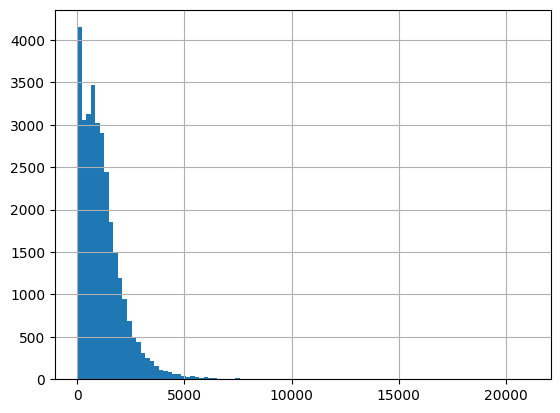

In [17]:
df_train["fluid_intake_sum"].hist(bins=100)
print(df_train["fluid_intake_sum"].mean())
print(df_train["fluid_intake_sum"].max())
print(df_train["fluid_intake_sum"].quantile(0.95))

# Generate

In [18]:
import numpy as np

def calculate_states(array1, array2):
    """
    Categorize two NumPy arrays into discrete states and compute unique scores.

    Parameters:
        array1 (numpy.ndarray): The first array.
        array2 (numpy.ndarray): The second array.

    Returns:
        numpy.ndarray: A NumPy array of scores representing unique states (0 to 8).
    """
    # Validate input
    if len(array1) != len(array2):
        raise ValueError("Both arrays must have the same length.")
    median_1 = np.median(array1[array1 != 0])  # median for non 0 values
    median_2 = np.median(array2[array2 != 0])  # median for non 0 values
    # Define categories for array1
    cat1 = np.zeros_like(array1, dtype=int)
    cat1[array1 == 0] = 0
    cat1[(array1 > 0) & (array1 <= median_1)] = 1
    cat1[(array1 > median_1)] = 2

    # Define categories for array2
    cat2 = np.zeros_like(array2, dtype=int)
    cat2[array2 == 0] = 0
    cat2[(array2 > 0) & (array2 <= median_2)] = 1
    cat2[(array2 > median_2)] = 2
    #print(cat2)
    print(median_1)
    print(median_2)

    # Compute unique scores based on the combination of categories
    # Scores are computed as: cat1 * 3 + cat2
    scores = cat1 * 3 + cat2
    print("Fluids", np.unique(cat1, return_counts=True))
    print("VPs", np.unique(cat2, return_counts=True))

    return scores
df_train["action"] = calculate_states(df_train["fluid_intake_sum"].values, gamma_avg.values)
print(df_train["action"].unique())

1028.39998971
0.11174761391448733
Fluids (array([0, 1, 2]), array([ 2122, 14394, 14393]))
VPs (array([0, 1, 2]), array([20546,  5182,  5181]))
[0 8 6 7 3 5 4]


[0 8 6 7 3 5 4]


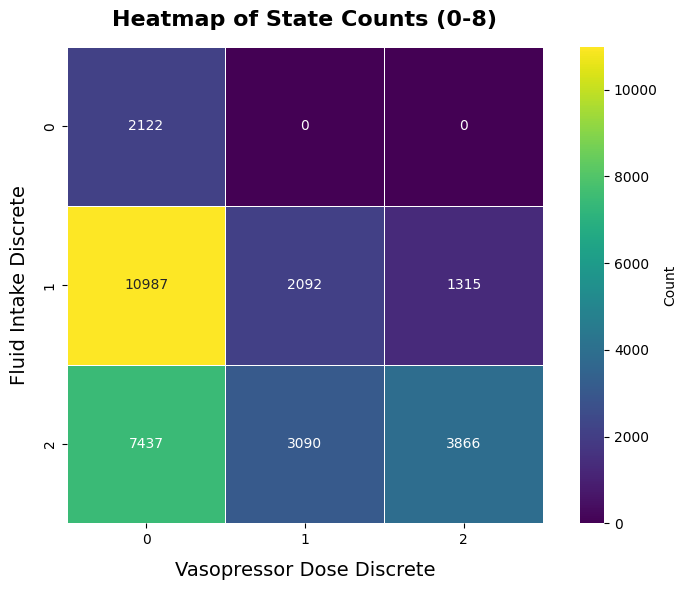

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_heatmap(scores):
    """
    Plot a 3x3 heatmap where each cell is colored by the count of scores (0-8).

    Parameters:
        scores (numpy.ndarray): Array of scores in the range [0, 8].

    Returns:
        None
    """
    # Ensure scores are within the valid range [0, 8]
    if not np.all((0 <= scores) & (scores <= 8)):
        raise ValueError("Scores must be in the range [0, 8].")

    # Count occurrences for each score
    counts = np.bincount(scores, minlength=9)

    # Reshape counts into a 3x3 matrix
    heatmap_matrix = counts.reshape(3, 3)

    # Create the heatmap using Seaborn
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(
        heatmap_matrix,
        annot=True,                # Annotate with count values
        fmt="d",                   # Integer format for annotations
        cmap="viridis",            # Color map
        cbar_kws={"label": "Count"},  # Colorbar label
        linewidths=0.5,            # Add gridlines for clarity
        linecolor="white",         # Gridline color
        square=True                # Ensure square cells
    )

    # Add labels and title
    ax.set_title("Heatmap of State Counts (0-8)", fontsize=16, fontweight="bold", pad=15)
    ax.set_xlabel("Vasopressor Dose Discrete", fontsize=14, labelpad=10)
    ax.set_ylabel("Fluid Intake Discrete", fontsize=14, labelpad=10)
    ax.set_xticks([0.5, 1.5, 2.5], ["0", "1", "2"])
    ax.set_yticks([0.5, 1.5, 2.5], ["0", "1", "2"])

    # Adjust plot layout
    plt.tight_layout()
    plt.show()

# Example usage
print(df_train["action"].unique())
plot_heatmap(df_train["action"].values)


# Outcome Data - In hospital Mortality

<ipython-input-20-5222d202262f>:2: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  sepsis_death = pd.read_gbq(


9995 persons died of sepsis in the hospital
20914 persons survived ICU


<Axes: >

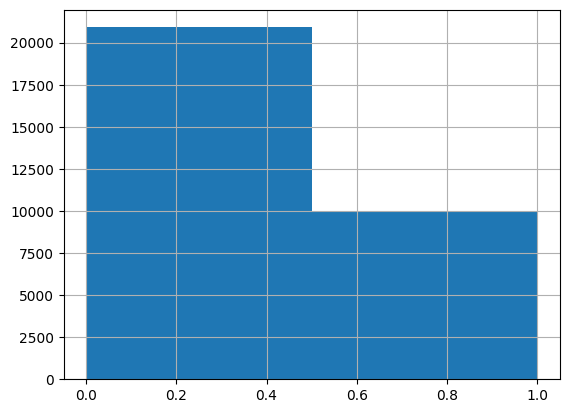

In [20]:
#df_train = df_train.reset_index()
sepsis_death = pd.read_gbq(
    f'''
    SELECT
        vo.person_id,
        vo.visit_occurrence_id,
        d.death_datetime,
        vo.visit_start_datetime,
        vo.visit_end_datetime,
        ABS(TIMESTAMP_DIFF(vo.visit_start_datetime, d.death_datetime, DAY)) AS in_hospital_survived
    from visit_occurrence AS vo
    LEFT JOIN death AS d
        ON vo.person_id = d.person_id
    WHERE vo.visit_occurrence_id IN {tuple(df_train["visit_occurrence_id"].tolist())}
    GROUP BY vo.person_id, vo.visit_occurrence_id, d.death_datetime, vo.visit_start_datetime, vo.visit_end_datetime
    '''
    , configuration=config_gbq, use_bqstorage_api=True)
# Ensure the columns are datetime objects
sepsis_death['death_datetime'] = pd.to_datetime(sepsis_death['death_datetime'])
sepsis_death['visit_end_datetime'] = pd.to_datetime(sepsis_death['visit_end_datetime'])
sepsis_death['visit_start_datetime'] = pd.to_datetime(sepsis_death['visit_start_datetime'])

# Set 'in_hospital_survived' to NaN where death_datetime is after visit_end_datetime
sepsis_death.loc[:,'died_in_hospital'] = 0
sepsis_death.loc[
    (sepsis_death['death_datetime'] <= sepsis_death['visit_end_datetime']) &\
    (sepsis_death['death_datetime'] >= sepsis_death['visit_start_datetime']),
    'died_in_hospital'
] = 1
sepsis_death['died_in_hospital'] = sepsis_death['died_in_hospital'].fillna(0).astype(int)

sepsis_death_filtered = sepsis_death.merge(
    df_train[["visit_occurrence_id"]],
    on="visit_occurrence_id",
    how="inner"
)
print((sepsis_death_filtered["died_in_hospital"]==1).sum(), "persons died of sepsis in the hospital")
print((sepsis_death_filtered["died_in_hospital"]==0).sum(), "persons survived ICU")

sepsis_death_filtered["died_in_hospital"].hist(bins=2)


<ipython-input-21-7ddc868a9ec8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


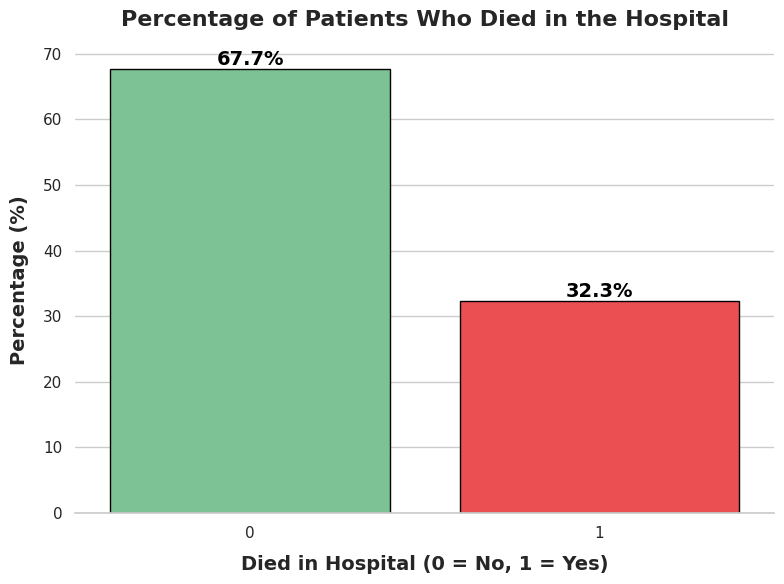

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage distribution
counts = sepsis_death_filtered["died_in_hospital"].value_counts(normalize=True) * 100

# Create a DataFrame for seaborn
plot_data = counts.reset_index()
plot_data.columns = ["Died in Hospital", "Percentage"]

# Create the Seaborn barplot
sns.set_theme(style="whitegrid")  # Set Seaborn theme
fig, ax = plt.subplots(figsize=(8, 6))
palette = ["#76c893", "#f94144"]  # Custom colors for 'No' and 'Yes'

sns.barplot(
    x="Died in Hospital", y="Percentage", data=plot_data,
    palette=palette, ax=ax, saturation=0.85, edgecolor="black"
)

# Customize the plot
ax.set_title("Percentage of Patients Who Died in the Hospital", fontsize=16, fontweight="bold", pad=15)
ax.set_xlabel("Died in Hospital (0 = No, 1 = Yes)", fontsize=14, fontweight="bold", labelpad=10)
ax.set_ylabel("Percentage (%)", fontsize=14, fontweight="bold", labelpad=10)

# Annotate the bars with percentages
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=14, fontweight="bold", color="black")

# Remove unnecessary spines
sns.despine(left=True, bottom=False)

# Show the plot
plt.tight_layout()
plt.show()


In [22]:
# Making the binary in-hospital death
df_train = df_train.merge(
    sepsis_death_filtered[["visit_occurrence_id", "died_in_hospital"]],
    on="visit_occurrence_id",
    how="left",
    suffixes=("", "_new")
)
print(df_train["died_in_hospital"].unique())
df_train["died_in_hospital"] = df_train["died_in_hospital"].fillna(0).astype(int)

[1 0]


         visit_occurrence_id  seq_id  died_in_hospital
0                         11       1                 1
1                         11       2                 1
2                         11       3                 1
3                         11       4                 1
4                         11       5                 1
...                      ...     ...               ...
2792496                23540      32                 0
2792497                23540      33                 0
2792498                23540      34                 0
2792499                23540      35                 0
2792500                23540      36                 0

[2792501 rows x 3 columns]
[   0 -100  100]


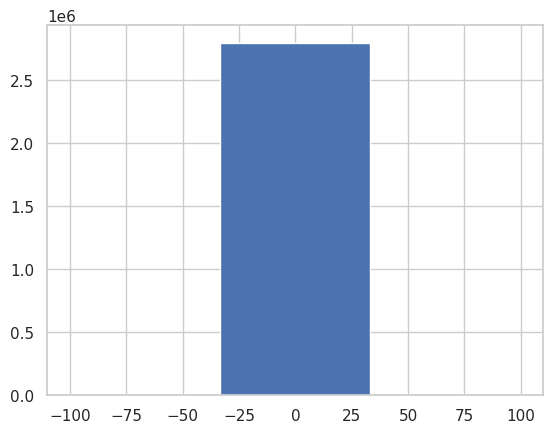

In [23]:
df_train["reward"] = 0
df_train = df_train.sort_values(by=["visit_occurrence_id", "measurement_datetime"])
# Add sequence_id within each visit_occurrence_id
df_train["seq_id"] = df_train.groupby("visit_occurrence_id").cumcount() + 1
# Find the row index for the maximum sequence_id for each visit_occurrence_id
max_sequence_indices = df_train.groupby("visit_occurrence_id")["seq_id"].idxmax()
print(df_train[["visit_occurrence_id", "seq_id", "died_in_hospital"]])

# Set reward to 100 or -100 based on died_in_hospital flag
df_train.loc[max_sequence_indices, "reward"] = df_train.loc[max_sequence_indices, "died_in_hospital"].apply(
    lambda x: 100 if x == 0.0 else -100
)

df_train["reward"].hist(bins=3)
print(df_train["reward"].unique())

# Obtaining States

In [24]:
# Clustering
from src.clustering import cluster_kmpp
# chose numeric columns
print(df_train.columns)
df_train_clust = df_train[[
    'Gender', 'age_at_visit', 'Alanine aminotransferase',
    'Albumin', 'Aspartate aminotransferase', 'Base excess', 'Bicarbonate',
    'Bilirubin.total', 'Calcium', 'Calcium.ionized',
    'Chloride', 'Creatinine', 'Diastolic blood pressure', 'FiO2', 'Glucose',
    'Hemoglobin', 'INR', 'Lactate', 'Leukocytes', 'Magnesium',
    'Mean Blood Pressure', 'PaOxygen', 'Platelets', 'Potassium',
    'Respiratory rate', 'Sodium', 'SpO2', 'Systolic Blood Pressure', 'Urea',
    'Urine', 'Weight', 'aPTT', 'pH Blood', 'ventilatory_support',
    'pao2_fio2_ratio', 'pao2']]

kmeans, cluster_centers = cluster_kmpp(df_train_clust, k=200)
df_train["state"] = kmeans.predict(df_train_clust)

Index(['visit_occurrence_id', 'measurement_datetime',
       'Alanine aminotransferase', 'Albumin', 'Aspartate aminotransferase',
       'Base excess', 'Bicarbonate', 'Bilirubin.total', 'Calcium',
       'Calcium.ionized', 'Chloride', 'Creatinine', 'Diastolic blood pressure',
       'FiO2', 'Glucose', 'Heart Rate', 'Hemoglobin', 'INR', 'Lactate',
       'Leukocytes', 'Magnesium', 'Mean Blood Pressure', 'PT', 'PaOxygen',
       'Platelets', 'Potassium', 'Respiratory rate', 'Sodium', 'SpO2',
       'Systolic Blood Pressure', 'Temperature', 'Urea', 'Urine', 'Weight',
       'aPTT', 'pH Blood', 'paCO2', 'sofa_cns_score', 'ventilatory_support',
       'pao2_fio2_ratio', 'pao2', 'Gender', 'age_at_visit', 'window_end',
       'fluid_intake_sum', 'fluid_intake', 'action', 'died_in_hospital',
       'reward', 'seq_id'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [25]:
df_train.describe()

visit_occurrence_id  Alanine aminotransferase       Albumin  \
count            2792501.0              2.792501e+06  2.792501e+06   
mean           11592.72969              2.774873e-02 -2.239339e-02   
std             6390.22611              9.170385e-01  8.693450e-01   
min                   11.0             -3.555820e+00 -3.194766e+00   
25%                 6903.0             -6.201996e-01 -6.501609e-01   
50%                11572.0              1.376946e-02  3.772823e-02   
75%                16958.0              6.571696e-01  4.744368e-01   
max                23540.0              2.099118e+00  2.409332e+00   

       Aspartate aminotransferase   Base excess   Bicarbonate  \
count                2.792501e+06  2.792501e+06  2.792501e+06   
mean                -1.006845e-01  1.936406e-01  2.530037e-01   
std                  9.241856e-01  9.468324e-01  9.590012e-01   
min                 -3.421844e+00 -2.608514e+00 -2.793953e+00   
25%                 -7.291254e-01 -4.259893e-01 -3.579342e-01   
50%                 -1.327108e-01  1.924350e-01  2.355967e-01   
75%                  5.296381e-01  8.198333e-01  8.840503e-01   
max                  2.125376e+00  3.220497e+00  2.854861e+00   

       Bilirubin.total       Calcium  Calcium.ionized      Chloride  ...  \
count     2.792501e+06  2.792501e+06     2.792501e+06  2.792501e+06  ...   
mean     -1.134043e-01  1.575279e-01     1.199020e-01 -9.066847e-02  ...   
std       9.217782e-01  9.409030e-01     9.661238e-01  9.532416e-01  ...   
min      -2.957541e+00 -2.866590e+00    -2.532094e+00 -3.814241e+00  ...   
25%      -7.942452e-01 -4.090157e-01    -3.975770e-01 -8.000044e-01  ...   
50%      -1.383177e-01  9.468398e-02     1.534590e-01 -1.793175e-01  ...   
75%       5.026120e-01  7.079540e-01     6.332266e-01  5.755023e-01  ...   
max       2.027653e+00  2.680554e+00     3.024169e+00  2.360150e+00  ...   

               pao2        Gender  age_at_visit  fluid_intake_sum  \
count  2.792501e+06  2.792501e+06  2.792501e+06      2.792501e+06   
mean   7.560452e-02  5.992170e-01  1.354177e-01      1.034446e+03   
std    9.860012e-01  4.900572e-01  8.735822e-01      8.591270e+02   
min   -9.157760e+00  0.000000e+00 -1.871053e+00      0.000000e+00   
25%   -5.702986e-01  0.000000e+00 -7.341640e-01      4.328000e+02   
50%   -5.320581e-03  1.000000e+00  2.646993e-01      8.577000e+02   
75%    6.828998e-01  1.000000e+00  7.771832e-01      1.402400e+03   
max    1.970590e+01  1.000000e+00  2.288061e+00      2.105260e+04   

       fluid_intake        action  died_in_hospital        reward  \
count  2.792501e+06  2.792501e+06      2.792501e+06  2.792501e+06   
mean   1.034446e+03  4.597330e+00      4.459139e-01  1.160250e-02   
std    8.591270e+02  2.017614e+00      4.970662e-01  1.684053e+00   
min    0.000000e+00  0.000000e+00      0.000000e+00 -1.000000e+02   
25%    4.328000e+02  3.000000e+00      0.000000e+00  0.000000e+00   
50%    8.577000e+02  4.000000e+00      0.000000e+00  0.000000e+00   
75%    1.402400e+03  6.000000e+00      1.000000e+00  0.000000e+00   
max    2.105260e+04  8.000000e+00      1.000000e+00  1.000000e+02   

             seq_id         state  
count  2.792501e+06  2.792501e+06  
mean   2.346093e+04  9.737326e+01  
std    4.252682e+04  5.696050e+01  
min    1.000000e+00  0.000000e+00  
25%    1.875000e+03  4.600000e+01  
50%    6.124000e+03  9.700000e+01  
75%    1.830900e+04  1.460000e+02  
max    2.218410e+05  1.990000e+02  

[8 rows x 49 columns]

<ipython-input-26-7953ad875762>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = plt.cm.get_cmap("tab10", len(unique_clusters))


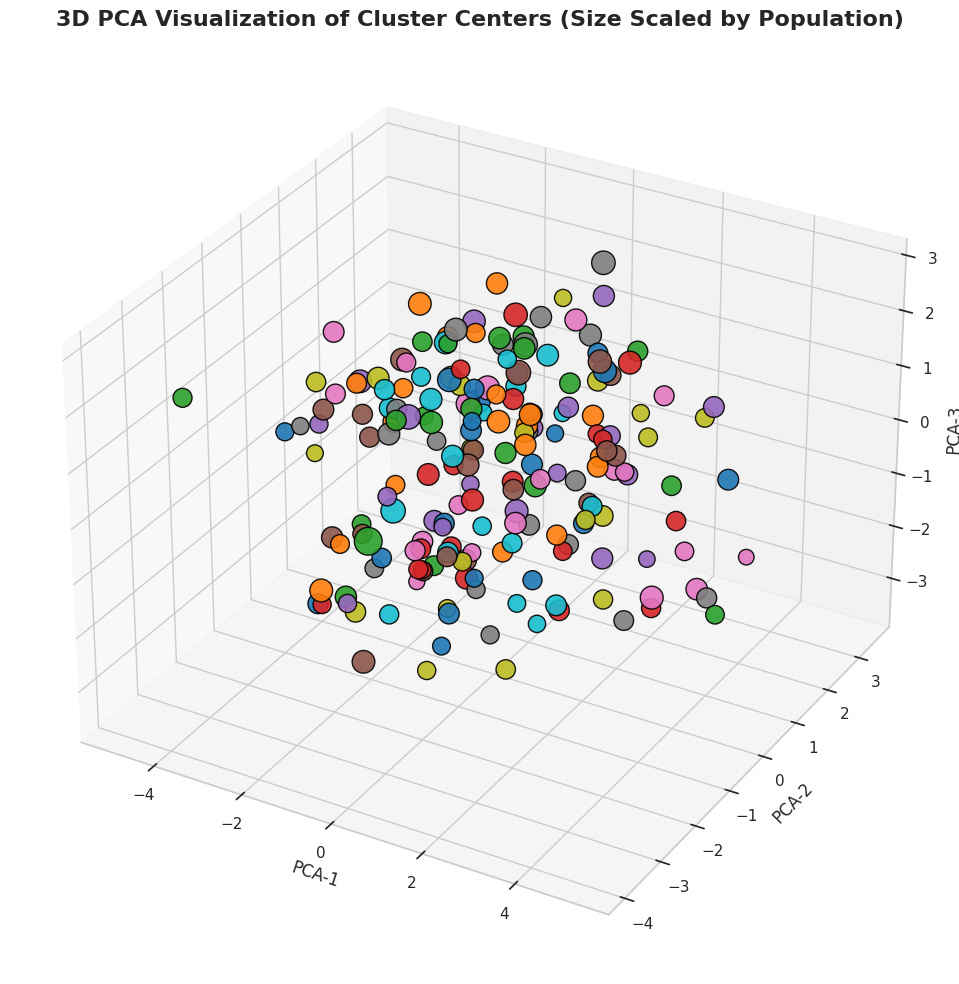

In [26]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data (replace with your clustered data)
data = df_train_clust.copy().values  # Replace with your data
cluster_labels = df_train["state"].values  # Replace with your cluster labels

# Calculate cluster centers and sizes
unique_clusters = np.unique(cluster_labels)
cluster_centers = np.array([data[cluster_labels == cluster].mean(axis=0) for cluster in unique_clusters])
cluster_sizes = np.array([np.sum(cluster_labels == cluster) for cluster in unique_clusters])  # Cluster population

# Apply PCA to reduce cluster centers to 3D
pca = PCA(n_components=3)
pca_results = pca.fit_transform(cluster_centers)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(pca_results, columns=["PCA-1", "PCA-2", "PCA-3"])
pca_df["Cluster"] = unique_clusters
pca_df["Size"] = cluster_sizes

# Generate a color palette for distinct colors
color_palette = plt.cm.get_cmap("tab10", len(unique_clusters))
colors = [color_palette(cluster) for cluster in unique_clusters]

# Normalize cluster sizes for plotting
marker_sizes = (pca_df["Size"] / pca_df["Size"].max()) * 300 + 100  # Scale marker sizes

# 3D Plot using Matplotlib
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for cluster centers
scatter = ax.scatter(
    pca_df["PCA-1"], pca_df["PCA-2"], pca_df["PCA-3"],
    c=colors, s=marker_sizes, alpha=0.9, edgecolor="black"
)

# Add labels and title
ax.set_title("3D PCA Visualization of Cluster Centers (Size Scaled by Population)", fontsize=16, fontweight="bold")
ax.set_xlabel("PCA-1", fontsize=12)
ax.set_ylabel("PCA-2", fontsize=12)
ax.set_zlabel("PCA-3", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


In [27]:
del data

In [28]:
df_train[["state", "action", "reward", "seq_id"]].head()

state  action  reward  seq_id
0    129       0       0       1
1    129       0       0       2
2    129       0       0       3
3    129       0       0       4
4    156       8       0       5

# Transform df for training

In [29]:
import pandas as pd

# Example DataFrame
df_train_rl = df_train[['state','action','reward','seq_id','visit_occurrence_id']]

# Initialize an empty list to store trajectory data
trajectory_data = []

# Group by 'id' to handle each trajectory independently
for _, group in df_train_rl.groupby('visit_occurrence_id'):
    group = group.sort_values('seq_id')  # Ensure the sequence is sorted
    states = group['state'].tolist()
    actions = group['action'].tolist()
    rewards = group['reward'].tolist()

    # Create next_state by shifting 'state' column
    next_states = states[1:] + [None]  # Last next_state is None

    # Create done flag (1 for the last step, 0 otherwise)
    done_flags = [0] * (len(states) - 1) + [1]

    # Build the trajectory data
    for i in range(len(states)):
        trajectory_data.append({
            'state': states[i],
            'action': actions[i],
            'reward': rewards[i],
            'next_state': next_states[i],
            'done': done_flags[i]
        })

# Convert trajectory data to a DataFrame
trajectory_data = pd.DataFrame(trajectory_data)

# Display the result
print(trajectory_data)


         state  action  reward  next_state  done
0          129       0       0       129.0     0
1          129       0       0       129.0     0
2          129       0       0       129.0     0
3          129       0       0       156.0     0
4          156       8       0       156.0     0
...        ...     ...     ...         ...   ...
2792496     17       7       0        17.0     0
2792497     17       7       0        17.0     0
2792498     17       7       0        17.0     0
2792499     17       7       0        17.0     0
2792500     17       7     100         NaN     1

[2792501 rows x 5 columns]


In [30]:
import numpy as np
import pandas as pd

class QLearningAgent:
    def __init__(self, num_states, num_actions, learning_rate=0.01, discount_factor=0.9, exploration_rate=0.1):
        self.num_states = num_states
        self.num_actions = num_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.q_table = np.zeros((num_states, num_actions))

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.exploration_rate:
            return np.random.choice(self.num_actions)  # Explore: choose a random action
        else:
            return np.argmax(self.q_table[state, :])  # Exploit: choose the action with the highest Q-value

    def learn(self, state, action, reward, next_state, done):
        if next_state is not None and not np.isnan(next_state): # Check for None and NaN
            best_next_action = np.argmax(self.q_table[int(next_state), :])
            td_target = reward + self.discount_factor * self.q_table[int(next_state), best_next_action]
        else:
            td_target = reward  # No next state, so only consider the immediate reward
        td_error = td_target - self.q_table[state, action]
        self.q_table[state, action] += self.learning_rate * td_error

# Initialize the agent
num_states = df_train["state"].max() + 1
num_actions = 9
agent = QLearningAgent(num_states, num_actions)

# Training loop using vectorized operations
num_epochs = 100
batch_size = 32

for epoch in range(num_epochs):
    # Shuffle the trajectory data
    trajectory_data = trajectory_data.sample(frac=1).reset_index(drop=True)

    for i in range(0, len(trajectory_data), batch_size):
        batch = trajectory_data.iloc[i : i + batch_size]

        states = batch['state'].to_numpy(dtype=int)
        actions = batch['action'].to_numpy(dtype=int)
        rewards = batch['reward'].to_numpy(dtype=float)
        next_states = batch['next_state'].to_numpy()
        done_flags = batch['done'].to_numpy(dtype=bool)

        # Convert next_states to valid indices and identify terminal states
        next_states_int = np.nan_to_num(next_states, nan=-1).astype(int)
        valid_next_states_mask = next_states_int != -1

        # Compute TD targets
        td_targets = np.zeros_like(rewards, dtype=float)
        td_targets[valid_next_states_mask] = (
            rewards[valid_next_states_mask]
            + agent.discount_factor
            * np.max(agent.q_table[next_states_int[valid_next_states_mask], :], axis=1)
        )
        td_targets[~valid_next_states_mask] = rewards[~valid_next_states_mask]  # Terminal states

        # Compute TD errors and update Q-values
        td_errors = td_targets - agent.q_table[states, actions]
        agent.q_table[states, actions] += agent.learning_rate * td_errors

# Access the learned Q-table: agent.q_table
agent.q_table

array([[ 0.11197262,  0.        ,  0.        , ..., -0.00440102,
         0.11123307,  0.11072683],
       [ 0.52437984,  0.        ,  0.        , ...,  0.472143  ,
         0.48102279,  0.        ],
       [ 0.23648197,  0.        ,  0.        , ...,  0.21590017,
         0.21771955,  0.21545907],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.15146048,
        -1.53616639,  0.18536702],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.01597344,  0.01589555],
       [ 0.1461593 ,  0.        ,  0.        , ...,  0.14567041,
         0.        ,  0.16047334]])

# Transform df for testing

In [67]:
df_test_clust = df_test[[
    'Gender', 'age_at_visit', 'Alanine aminotransferase',
    'Albumin', 'Aspartate aminotransferase', 'Base excess', 'Bicarbonate',
    'Bilirubin.total', 'Calcium', 'Calcium.ionized',
    'Chloride', 'Creatinine', 'Diastolic blood pressure', 'FiO2', 'Glucose',
    'Hemoglobin', 'INR', 'Lactate', 'Leukocytes', 'Magnesium',
    'Mean Blood Pressure', 'PaOxygen', 'Platelets', 'Potassium',
    'Respiratory rate', 'Sodium', 'SpO2', 'Systolic Blood Pressure', 'Urea',
    'Urine', 'Weight', 'aPTT', 'pH Blood', 'ventilatory_support',
    'pao2_fio2_ratio', 'pao2']]

df_test["state"] = kmeans.predict(df_test_clust)  # Using the previously fitted kmeans

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [68]:
df_test.head()

Alanine aminotransferase  \
visit_occurrence_id measurement_datetime                                  
38                  2012-12-31 12:00:00+00:00                 -0.120753   
                    2013-01-01 00:00:00+00:00                  1.668290   
                    2013-01-01 12:00:00+00:00                  1.668290   
                    2013-01-02 00:00:00+00:00                  1.197441   
                    2013-01-02 12:00:00+00:00                  1.098988   

                                                Albumin  \
visit_occurrence_id measurement_datetime                  
38                  2012-12-31 12:00:00+00:00  1.268750   
                    2013-01-01 00:00:00+00:00  1.611627   
                    2013-01-01 12:00:00+00:00  0.889917   
                    2013-01-02 00:00:00+00:00  0.991224   
                    2013-01-02 12:00:00+00:00  1.483886   

                                               Aspartate aminotransferase  \
visit_occurrence_id measurement_datetime                                    
38                  2012-12-31 12:00:00+00:00                    0.164107   
                    2013-01-01 00:00:00+00:00                    1.729742   
                    2013-01-01 12:00:00+00:00                    1.729742   
                    2013-01-02 00:00:00+00:00                    0.963463   
                    2013-01-02 12:00:00+00:00                    0.750110   

                                               Base excess  Bicarbonate  \
visit_occurrence_id measurement_datetime                                  
38                  2012-12-31 12:00:00+00:00    -0.741416    -0.407735   
                    2013-01-01 00:00:00+00:00    -1.923721    -1.994807   
                    2013-01-01 12:00:00+00:00    -1.619806    -1.505445   
                    2013-01-02 00:00:00+00:00    -0.983594    -1.030489   
                    2013-01-02 12:00:00+00:00    -0.870997    -0.786332   

                                               Bilirubin.total   Calcium  \
visit_occurrence_id measurement_datetime                                   
38                  2012-12-31 12:00:00+00:00        -0.328413  0.848909   
                    2013-01-01 00:00:00+00:00        -0.082764 -0.190010   
                    2013-01-01 12:00:00+00:00         0.021207 -0.086216   
                    2013-01-02 00:00:00+00:00         0.021207 -0.285428   
                    2013-01-02 12:00:00+00:00        -0.138318 -0.346286   

                                               Calcium.ionized  Chloride  \
visit_occurrence_id measurement_datetime                                   
38                  2012-12-31 12:00:00+00:00        -1.177301 -0.595235   
                    2013-01-01 00:00:00+00:00        -0.571319  0.482862   
                    2013-01-01 12:00:00+00:00         0.047110  0.674182   
                    2013-01-02 00:00:00+00:00         0.341186  0.604921   
                    2013-01-02 12:00:00+00:00        -0.242133  0.323532   

                                               Creatinine  ...      aPTT  \
visit_occurrence_id measurement_datetime                   ...             
38                  2012-12-31 12:00:00+00:00   -0.545732  ... -1.013325   
                    2013-01-01 00:00:00+00:00   -0.176678  ...  0.922301   
                    2013-01-01 12:00:00+00:00   -0.181812  ...  0.434708   
                    2013-01-02 00:00:00+00:00   -0.266026  ...  1.069953   
                    2013-01-02 12:00:00+00:00   -0.171560  ...  1.550646   

                                               pH Blood     paCO2  \
visit_occurrence_id measurement_datetime                            
38                  2012-12-31 12:00:00+00:00 -1.387273  0.936130   
                    2013-01-01 00:00:00+00:00 -1.211635 -1.485663   
                    2013-01-01 12:00:00+00:00 -1.332867 -0.707972   
                    2013-01-02 00:00:00+00:00 -0.207457 -1.075281   
                    2013-01-

In [69]:
# Action Calculation
from tqdm import tqdm

tqdm.pandas()

gamma_avg_test = calculate_actions(df_test[["visit_occurrence_id", "measurement_datetime"]], sepsis_vasopressors_cleaned)
df_test["fluid_intake_sum"] = add_windowed_sum_apply(
    df_test,
    sepsis_fluid_cleaned,
    "measurement_datetime",
    "value_as_number",
    "measurement_datetime",
    12,
    "fluid_intake_sum"
)

df_test["action"] = calculate_states(df_test["fluid_intake_sum"].values, gamma_avg_test.values)


KeyError: "None of [Index(['visit_occurrence_id', 'measurement_datetime'], dtype='object')] are in the [columns]"

In [ ]:
# Reward and Done Calculation
df_test = df_test.merge(
    sepsis_death_filtered[["visit_occurrence_id", "died_in_hospital"]],
    on="visit_occurrence_id",
    how="left",
    suffixes=("", "_new")
)
df_test["died_in_hospital"] = df_test["died_in_hospital"].fillna(0).astype(int)

df_test["reward"] = 0
df_test = df_test.sort_values(by=["visit_occurrence_id", "measurement_datetime"])
df_test["seq_id"] = df_test.groupby("visit_occurrence_id").cumcount() + 1
max_sequence_indices_test = df_test.groupby("visit_occurrence_id")["seq_id"].idxmax()

df_test.loc[max_sequence_indices_test, "reward"] = df_test.loc[max_sequence_indices_test, "died_in_hospital"].apply(
    lambda x: 100 if x == 0.0 else -100
)

df_test["done"] = 0
df_test.loc[max_sequence_indices_test, "done"] = 1


In [ ]:
# Next State Calculation
df_test = df_test.sort_values(by=["visit_occurrence_id", "measurement_datetime"])
df_test['next_state'] = df_test.groupby('visit_occurrence_id')['state'].shift(-1)

# Markov Decision Process

In [1]:
# Extract relevant columns for the test data
df_test_rl = df_test[['state', 'action', 'reward', 'next_state', 'done']]

# Calculate transition probabilities for the test data
transition_counts_test = df_test_rl.groupby(["state", "action", "next_state"]).size().reset_index(name="count")
state_action_counts_test = df_test_rl.groupby(["state", "action"]).size().reset_index(name="total_count")
transition_probs_test = pd.merge(transition_counts_test, state_action_counts_test, on=["state", "action"])
transition_probs_test["probability"] = transition_probs_test["count"] / transition_probs_test["total_count"]

# Calculate expected rewards for the test data
reward_means_test = df_test_rl.groupby(["state", "action"])["reward"].mean().reset_index(name="expected_reward")

# Combine transition probabilities and rewards to create the test MDP
empirical_mdp_test = pd.merge(transition_probs_test, reward_means_test, on=["state", "action"])

# Display empirical MDP
empirical_mdp_test

NameError: name 'df_test' is not defined

In [34]:
# Calculate transition probabilities
transition_counts = trajectory_data.groupby(["state", "action", "next_state"]).size().reset_index(name="count")
state_action_counts = trajectory_data.groupby(["state", "action"]).size().reset_index(name="total_count")
transition_probs = pd.merge(transition_counts, state_action_counts, on=["state", "action"])
transition_probs["probability"] = transition_probs["count"] / transition_probs["total_count"]

# Calculate rewards
reward_means = trajectory_data.groupby(["state", "action"])["reward"].mean().reset_index(name="expected_reward")

# Combine transition probabilities and rewards
empirical_mdp = pd.merge(transition_probs, reward_means, on=["state", "action"])

# Display the empirical MDP
empirical_mdp


state  action  next_state  count  total_count  probability  \
0         0       0         0.0     66           67     0.985075   
1         0       0       104.0      1           67     0.014925   
2         0       3         0.0   1774         1785     0.993838   
3         0       3        12.0      1         1785     0.000560   
4         0       3        13.0      1         1785     0.000560   
...     ...     ...         ...    ...          ...          ...   
9438    199       8        67.0      1          225     0.004444   
9439    199       8        73.0      1          225     0.004444   
9440    199       8       173.0      1          225     0.004444   
9441    199       8       179.0      1          225     0.004444   
9442    199       8       199.0    221          225     0.982222   

      expected_reward  
0            0.000000  
1            0.000000  
2           -0.112045  
3           -0.112045  
4           -0.112045  
...               ...  
9438         0.000000  
9439         0.000000  
9440         0.000000  
9441         0.000000  
9442         0.000000  

[9443 rows x 7 columns]

## Evaluation

In [44]:
learned_policy = np.argmax(agent.q_table, axis=1)

In [45]:
def simulate_policy(policy, mdp, num_trajectories=100, max_steps=100):
    total_rewards = []

    for _ in range(num_trajectories):
        state = np.random.choice(mdp['state'].unique())  # Start from a random initial state
        state = int(state)
        cumulative_reward = 0
        steps = 0
        done = False

        while not done and steps < max_steps:
            # Select action based on the policy
            if isinstance(policy, np.ndarray):  # Learned policy
                if state < 0 or state >= len(policy):
                    break  # Handle out-of-bounds state
                action = policy[state]
            elif callable(policy):  # Callable policy (clinician)
                action = policy(state)

            # Get possible transitions
            transitions = mdp[(mdp['state'] == state) & (mdp['action'] == action)]

            if transitions.empty:
                break

            # Sample next state based on transition probabilities
            next_state = transitions.sample(weights='probability')['next_state'].values[0]
            reward = transitions['expected_reward'].values[0]

            cumulative_reward += reward
            state = int(next_state) if not pd.isna(next_state) else None

            # Check if terminal
            done = next_state is None
            steps += 1

        total_rewards.append(cumulative_reward)

    return np.mean(total_rewards), np.std(total_rewards)


In [47]:
mean_reward, std_reward = simulate_policy(learned_policy, empirical_mdp, num_trajectories=100, max_steps=100)

In [48]:
def interquartile_mean(data):
    sorted_data = np.sort(data)
    q25, q75 = np.percentile(sorted_data, [25, 75])
    iqm_values = sorted_data[(sorted_data >= q25) & (sorted_data <= q75)]
    return np.mean(iqm_values)


In [49]:
import random

num_seeds = 5
reward_results = []

for _ in range(num_seeds):
    seed = random.randint(0, 10000)
    np.random.seed(seed)
    random.seed(seed)
    mean_reward, _ = simulate_policy(learned_policy, empirical_mdp, num_trajectories=100, max_steps=100)
    reward_results.append(mean_reward)

reward_results = np.array(reward_results)

In [50]:
# Compute Interquartile Mean (IQM)
iqm_score = interquartile_mean(reward_results)
print(f"Interquartile Mean (IQM) Reward: {iqm_score:.2f}")

Interquartile Mean (IQM) Reward: 7.30


In [51]:
from scipy.stats import bootstrap

# Compute Bootstrap Confidence Interval
ci = bootstrap((reward_results,), np.mean, confidence_level=0.95)
print(f"95% Confidence Interval: {ci.confidence_interval}")

95% Confidence Interval: ConfidenceInterval(low=6.896032395292435, high=8.680841502996236)


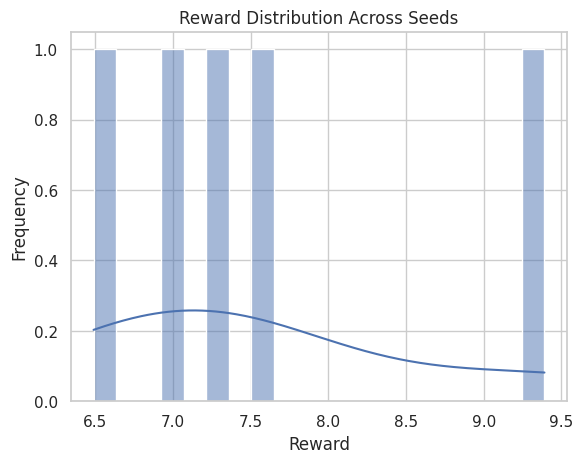

In [52]:
# Plot reward distributions
sns.histplot(reward_results, bins=20, kde=True)
plt.title("Reward Distribution Across Seeds")
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.show()

# Clinician Policy

In [53]:
# Count how many times each action was taken for each state
state_action_counts = trajectory_data.groupby(["state", "action"]).size().reset_index(name="count")

# Count total number of actions for each state
total_state_actions = trajectory_data.groupby("state")["action"].size().reset_index(name="total_count")

# Merge counts and calculate probabilities
clinician_policy_df = pd.merge(state_action_counts, total_state_actions, on="state")
clinician_policy_df["probability"] = clinician_policy_df["count"] / clinician_policy_df["total_count"]

clinician_policy_df


state  action  count  total_count  probability
0         0       0     67         6303     0.010630
1         0       3   1785         6303     0.283198
2         0       4   1131         6303     0.179438
3         0       5    417         6303     0.066159
4         0       6    694         6303     0.110106
...     ...     ...    ...          ...          ...
1226    199       0    180        12460     0.014446
1227    199       3   8597        12460     0.689968
1228    199       5   1066        12460     0.085554
1229    199       6   2392        12460     0.191974
1230    199       8    225        12460     0.018058

[1231 rows x 5 columns]

In [54]:
def clinician_policy(state):
    actions = clinician_policy_df[clinician_policy_df['state'] == state]
    return actions.sample(weights='probability')['action'].values[0]

In [55]:
# Evaluation clinician policy
num_seeds = 5
reward_results_clinician = []

for _ in range(num_seeds):
    seed = random.randint(0, 10000)
    np.random.seed(seed)
    random.seed(seed)

    # Evaluate clinician policy
    mean_reward_clinician, _ = simulate_policy(clinician_policy, empirical_mdp, num_trajectories=100, max_steps=100)
    reward_results_clinician.append(mean_reward_clinician)

reward_results_clinician = np.array(reward_results_clinician)

In [56]:
# Compute IQM for clinician policy
iqm_score_clinician = interquartile_mean(reward_results_clinician)
print(f"Clinician Policy - Interquartile Mean (IQM) Reward: {iqm_score_clinician:.2f}")


Clinician Policy - Interquartile Mean (IQM) Reward: 0.96


In [57]:
# Compute BCI for clinician policy
ci_clinician = bootstrap((reward_results_clinician,), np.mean, confidence_level=0.95)
print(f"Clinician Policy - 95% Confidence Interval: {ci_clinician.confidence_interval}")


Clinician Policy - 95% Confidence Interval: ConfidenceInterval(low=0.5387443294142804, high=1.4218497694174714)


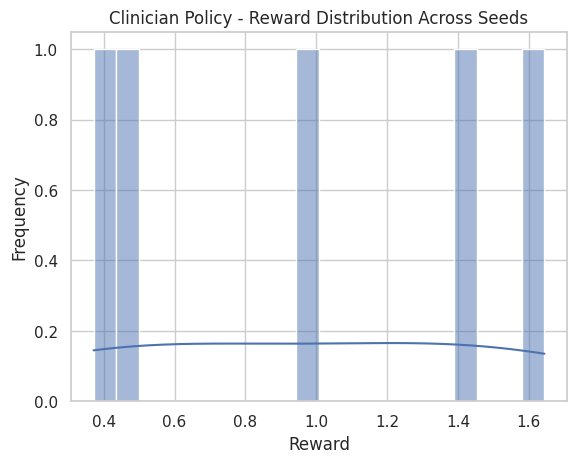

In [58]:
# Plot reward distribution for clinician policy
sns.histplot(reward_results_clinician, bins=20, kde=True)
plt.title("Clinician Policy - Reward Distribution Across Seeds")
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.show()

# Part of old code

In [ ]:
mean_reward, std_reward = simulate_policy(learned_policy, empirical_mdp)
print(f"Learned Policy: Mean Reward = {mean_reward}, Std Dev = {std_reward}")


Learned Policy: Mean Reward = 19.017791647691926, Std Dev = 57.221803352907564


In [ ]:
def clinician_policy(state):
    actions = clinician_policy_df[clinician_policy_df['state'] == state]
    return actions.sample(weights='probability')['action'].values[0]

mean_reward_clinician, std_reward_clinician = simulate_policy(clinician_policy, empirical_mdp)
print(f"Clinician Policy: Mean Reward = {mean_reward_clinician}, Std Dev = {std_reward_clinician}")


Clinician Policy: Mean Reward = 1.4233518062103039, Std Dev = 4.487933196363479


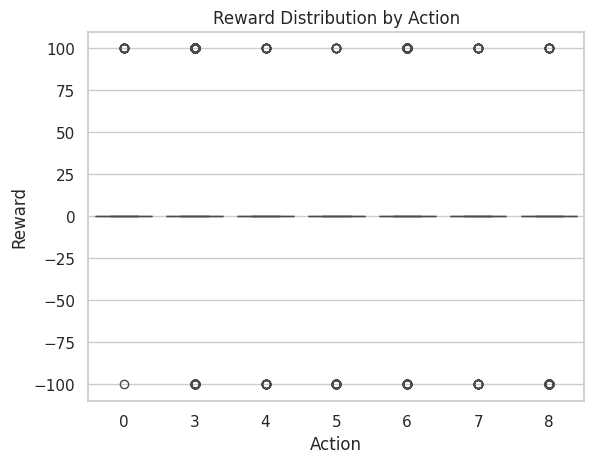

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="action", y="reward", data=trajectory_data)
plt.title("Reward Distribution by Action")
plt.xlabel("Action")
plt.ylabel("Reward")
plt.show()


In [ ]:
terminal_rewards = trajectory_data[trajectory_data["done"] == 1]["reward"].sum()
intermediate_rewards = trajectory_data[trajectory_data["done"] == 0]["reward"].sum()

print(f"Proportion of Terminal Rewards: {terminal_rewards / (terminal_rewards + intermediate_rewards):.2f}")


Proportion of Terminal Rewards: 1.00


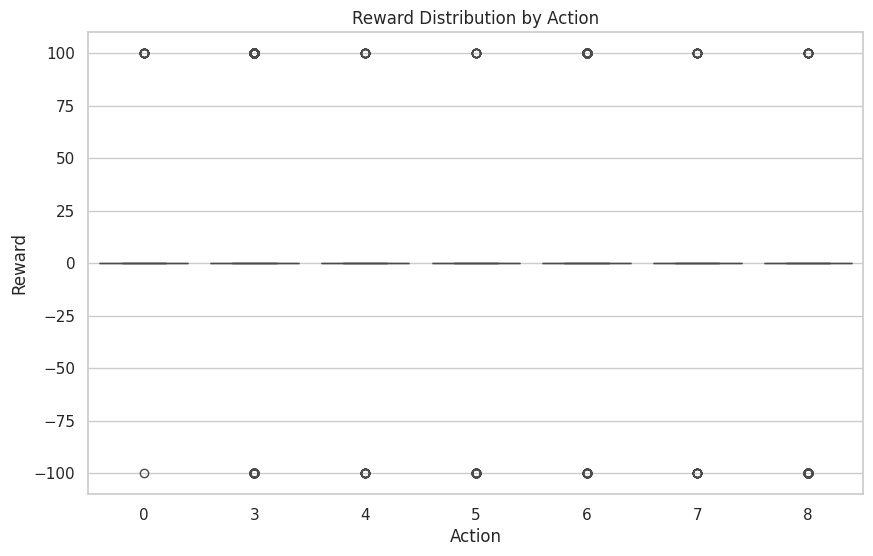

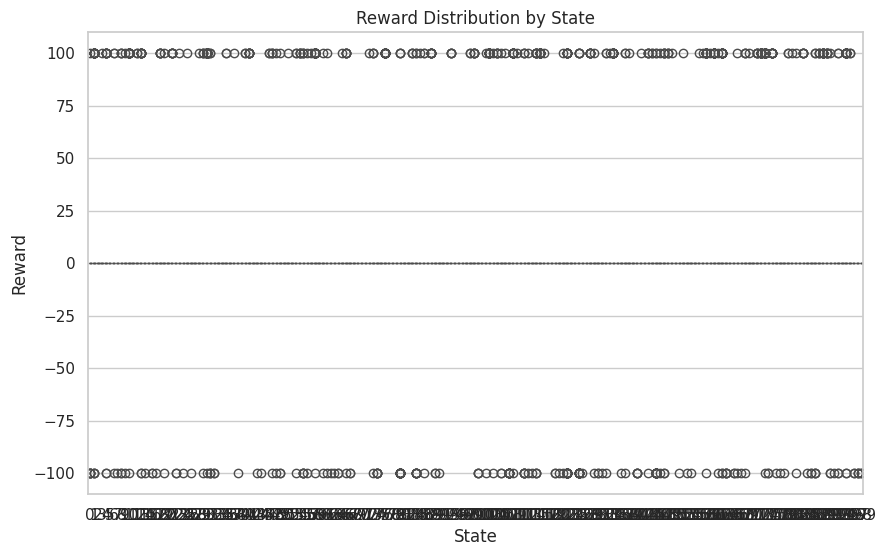

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reward distribution by action
plt.figure(figsize=(10, 6))
sns.boxplot(x="action", y="reward", data=trajectory_data)
plt.title("Reward Distribution by Action")
plt.xlabel("Action")
plt.ylabel("Reward")
plt.show()

# Reward distribution by state
plt.figure(figsize=(10, 6))
sns.boxplot(x="state", y="reward", data=trajectory_data)
plt.title("Reward Distribution by State")
plt.xlabel("State")
plt.ylabel("Reward")
plt.show()


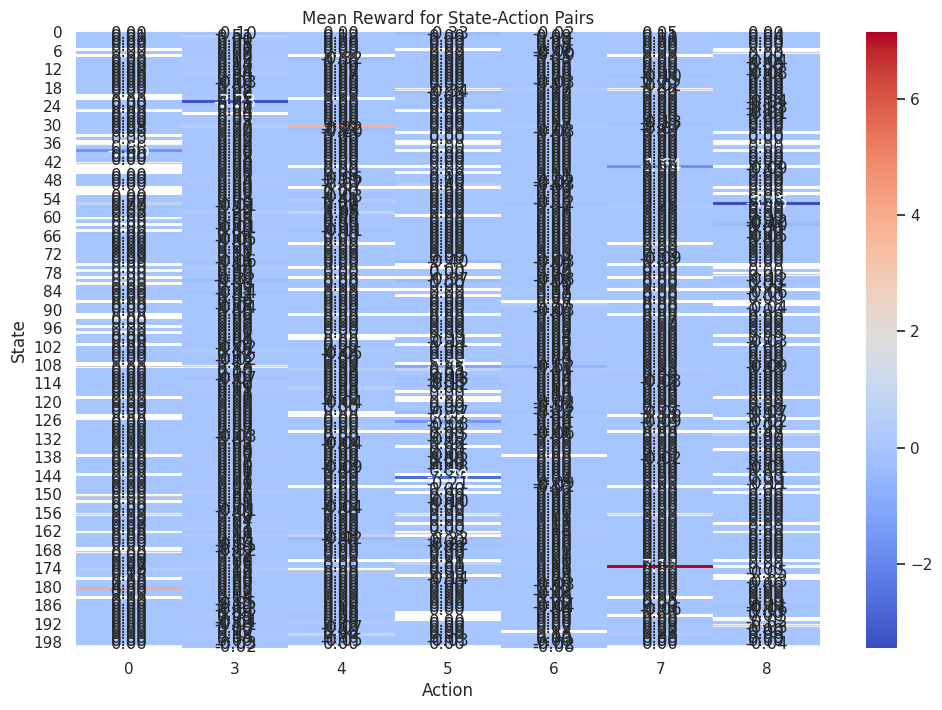

In [ ]:
# Pivot table for heatmap
reward_means = trajectory_data.groupby(["state", "action"])["reward"].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(reward_means, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Mean Reward for State-Action Pairs")
plt.xlabel("Action")
plt.ylabel("State")
plt.show()


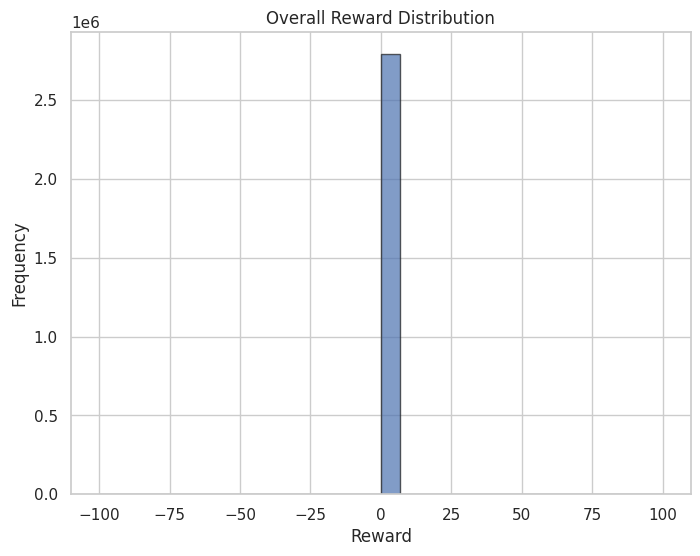

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(trajectory_data["reward"], bins=30, edgecolor="k", alpha=0.7)
plt.title("Overall Reward Distribution")
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.show()
